In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


## Correlação de graus e PageRank

*Exercício 1)* Dada a rede Metabólica anexa, calcule e faça um plot da matriz de correlação de graus e_{ij} correspondente, como na Figura 7.3(d,e,f) do Capítulo 7 do livro do Barabási.

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

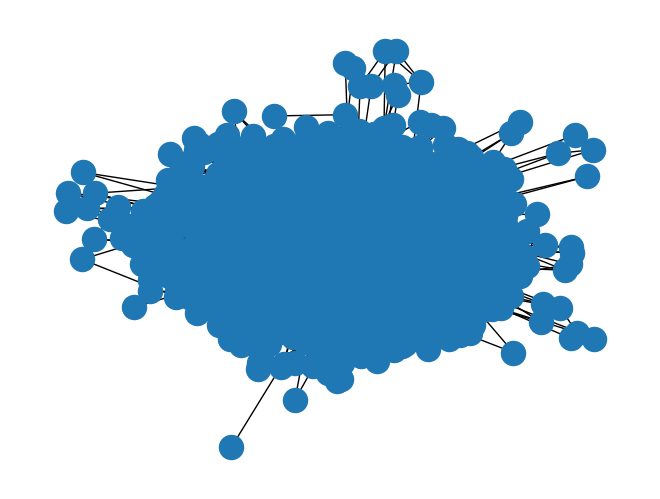

In [3]:
# Lendo a rede

# g = nx.read_edgelist("/content/drive/MyDrive/metabolic.edgelist.txt")
g = nx.read_edgelist("metabolic.edgelist.txt")
g = g.to_undirected()
nx.draw(g)

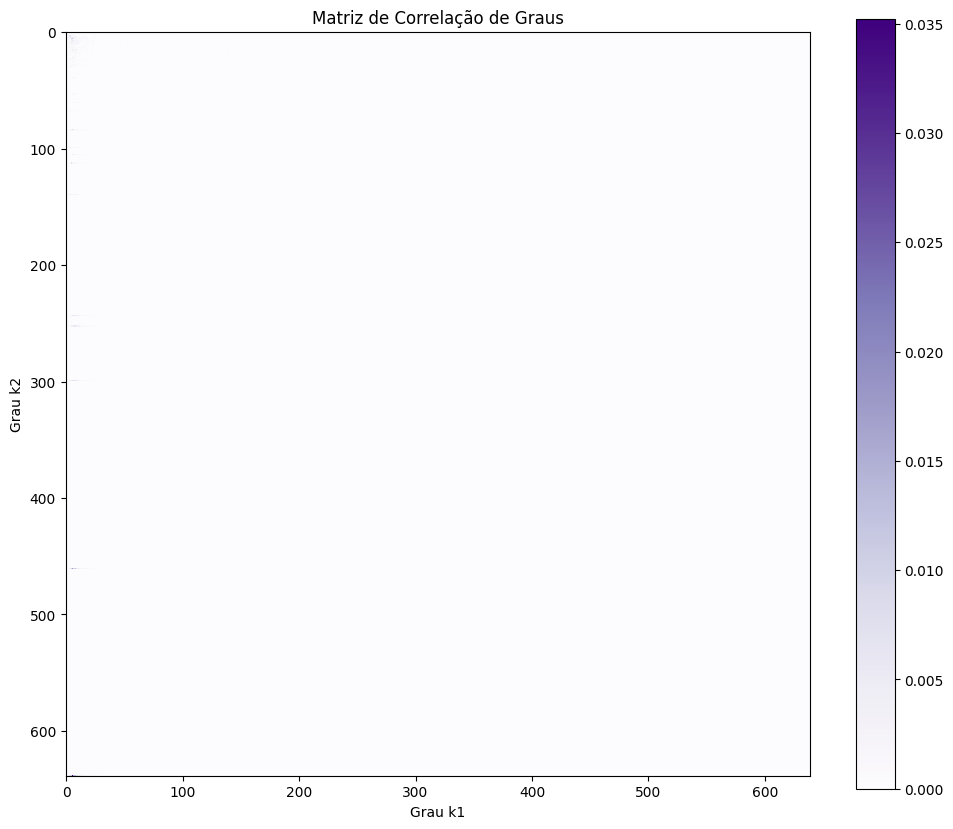

In [4]:
# Obter os graus dos vértices
degrees = np.array([degree for _, degree in g.degree()])

# Contar o número de arestas entre vértices com graus k1 e k2
max_degree = max(degrees)
degree_corr_matrix = np.zeros((max_degree + 1, max_degree + 1))

# Preencher a matriz de contagens
for u, v in g.edges():
    k1 = g.degree(u)  # grau do vértice u
    k2 = g.degree(v)  # grau do vértice v
    degree_corr_matrix[k1, k2] += 1

# Normalizar a matriz para que e_ij seja uma probabilidade
num_edges = g.number_of_edges()
degree_corr_matrix /= num_edges

# Ajustar o colormap automaticamente com base nos valores da matriz
vmin = np.min(degree_corr_matrix)  # Menor valor da matriz
vmax = np.max(degree_corr_matrix)  # Maior valor da matriz

# Plotar a matriz de correlação de grau com o colormap 'Purples'
plt.figure(figsize=(12, 10))
plt.imshow(degree_corr_matrix, cmap='Purples', interpolation='nearest', vmin=vmin, vmax=vmax)
plt.colorbar()  # Barra de cores
plt.title('Matriz de Correlação de Graus')
plt.xlabel('Grau k1')
plt.ylabel('Grau k2')
plt.show()


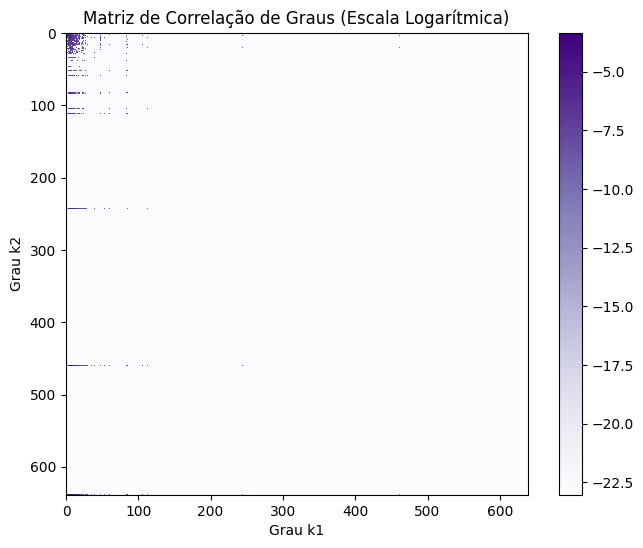

In [5]:
# Aplicar uma escala logarítmica para melhor visualização dos valores pequenos
degree_corr_matrix_log = np.log(degree_corr_matrix + 1e-10)  # Adiciona um pequeno valor para evitar log(0)

# Plotar a matriz de correlação com escala logarítmica
plt.figure(figsize=(8, 6))
plt.imshow(degree_corr_matrix_log, cmap='Purples', interpolation='nearest', vmin=np.min(degree_corr_matrix_log), vmax=np.max(degree_corr_matrix_log))
plt.colorbar()  # Barra de cores
plt.title('Matriz de Correlação de Graus (Escala Logarítmica)')
plt.xlabel('Grau k1')
plt.ylabel('Grau k2')
plt.show()




*Exercício 2)* Calcule e imprima o PageRank dos nós da rede 3649891_Newark.graphml. Faça um plot da rede, de forma que os nós com maior PageRank sejam proporcionalmente maiores.

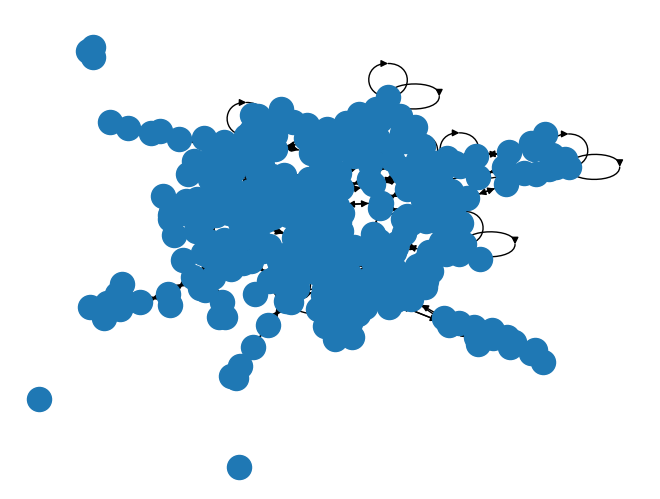

In [10]:
# g = nx.read_graphml("/content/drive/MyDrive/3649891_Newark.graphml")
g = nx.read_graphml("3649891_Newark.graphml")
nx.draw(g)

In [8]:
pagerank = nx.pagerank(g)

sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

print("\nPageRank dos nós (ordenado):")
for node, score in sorted_pagerank:
    print(f"Nó {node}: {score:.4f}")



PageRank dos nós (ordenado):
Nó 221526740: 0.0053
Nó 2958165159: 0.0052
Nó 221565894: 0.0047
Nó 221558613: 0.0045
Nó 221520781: 0.0045
Nó 1026686951: 0.0043
Nó 2958165172: 0.0043
Nó 2958165167: 0.0043
Nó 221583512: 0.0041
Nó 221577671: 0.0041
Nó 221547947: 0.0041
Nó 221567866: 0.0041
Nó 221567595: 0.0040
Nó 221577597: 0.0040
Nó 221508771: 0.0040
Nó 221575995: 0.0039
Nó 221511612: 0.0039
Nó 221577992: 0.0039
Nó 1026488239: 0.0039
Nó 1026488115: 0.0039
Nó 221509941: 0.0039
Nó 221511597: 0.0039
Nó 221567860: 0.0038
Nó 221565538: 0.0038
Nó 221508789: 0.0038
Nó 1026488026: 0.0038
Nó 1026488147: 0.0038
Nó 221562610: 0.0038
Nó 221576693: 0.0037
Nó 221566128: 0.0037
Nó 221556059: 0.0037
Nó 221564758: 0.0037
Nó 221593988: 0.0037
Nó 221525369: 0.0037
Nó 1473836612: 0.0037
Nó 221544661: 0.0036
Nó 1026488072: 0.0036
Nó 221526567: 0.0036
Nó 221567847: 0.0036
Nó 221574393: 0.0036
Nó 1473836617: 0.0035
Nó 221544799: 0.0035
Nó 221562261: 0.0035
Nó 2958165155: 0.0035
Nó 221562608: 0.0035
Nó 221544665:

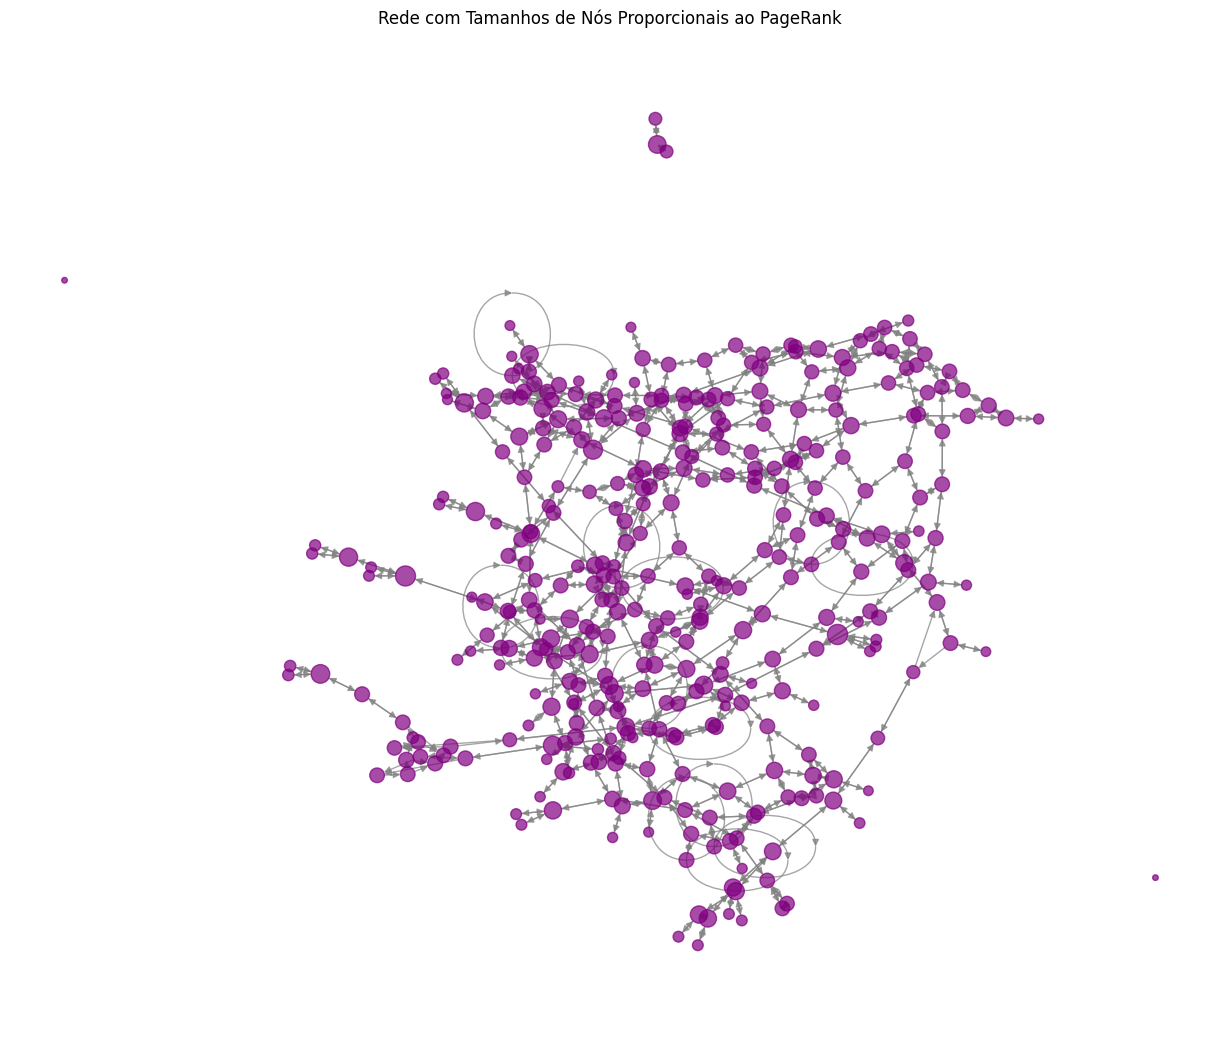

In [14]:
# Definir os tamanhos dos nós com base no PageRank
factor = 40000
node_sizes = [factor * pagerank[node] for node in g.nodes()]

# Passo 4: Plotar a rede
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(g, seed=42)  # Usar um layout que distribui bem os nós
nx.draw(
    g, pos,
    with_labels=False,
    node_size=node_sizes,  # Tamanho dos nós escalado pelo PageRank
    node_color='purple',
    font_size=8,
    font_color='white',
    edge_color='gray',
    alpha=0.7
)

# Mostrar o gráfico
plt.title("Rede com Tamanhos de Nós Proporcionais ao PageRank")
plt.show()
